# Fertility_and_Education

Hypothesis: by delaying women from birth event will reduce the fertility rate
The trend seen in the boxplot is that once women is into higher education, the age of firt birt inceases drastically atleast by 25%

The logistic regression model predicts that with completing higher education women is likely to give birth after 19 years
with 58 percent precission with recall values 0.78 and F1 score as 0.67


Significance of the study is that, 15th Finacne Commission has allocated 15% of it grants to states on basis of TFR,(desired TFR is 2.1)
The states higher than TFR 2.1 have the possibility to reduce it by positive measures as keeping women in education



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pyreadstat

# Loading NFHS 3 data taken from IAIR74FL.DTA

In [2]:
df, meta = pyreadstat.read_dta('pyth_nfhs 3.dta',apply_value_formats=True, formats_as_category=True)
df.head()

,caseid,v000,v001,v002,v003,v004,v005,v006,v007,v008,...,b5_03,b5_04,b5_05,b5_06,b5_07,b5_08,b5_09,v212,v213,v238
0,28 1 1 2,IA5,28001,1,2,NaN,2474583,1,2006,1273,...,yes,no,NaN,NaN,NaN,NaN,NaN,19,no or unsure,0
1,28 1 1 4,IA5,28001,1,4,NaN,2474583,1,2006,1273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,no or unsure,1
2,28 1 2 2,IA5,28001,2,2,NaN,2474583,3,2006,1275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,no or unsure,0
3,28 1 2 5,IA5,28001,2,5,NaN,2474583,3,2006,1275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no or unsure,0
4,28 1 4 3,IA5,28001,4,3,NaN,2474583,1,2006,1273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,no or unsure,0


In [ ]:
# knowing the variables used

In [3]:
## education categories ( 0- no education, 1 -primary, 2 - secondary, 3 - higher  )
df['v106'].unique()

['no education', 'primary', 'secondary', 'higher', 9]
Categories (5, object): ['no education', 'primary', 'secondary', 'higher', 9]

In [4]:
## wealth categories (1- poorest, 2 - porrer, 3 - middle, 4 - richer, 5 - richest)
df['v190'].unique()

['poorer', 'middle', 'richer', 'poorest', 'richest']
Categories (5, object): ['poorer', 'middle', 'richer', 'poorest', 'richest']

In [5]:
# number of births in last three years
df['v238'].unique()

array([0, 1, 2, 3, 4, 6], dtype=int64)

In [2]:
df, meta = pyreadstat.read_dta('pyth_nfhs 3.dta')

In [4]:
df.head()

,caseid,v000,v001,v002,v003,v004,v005,v006,v007,v008,...,b5_03,b5_04,b5_05,b5_06,b5_07,b5_08,b5_09,v212,v213,v238
0,28 1 1 2,IA5,28001,1,2,NaN,2474583,1,2006,1273,...,1,0,NaN,NaN,NaN,NaN,NaN,19,0,0
1,28 1 1 4,IA5,28001,1,4,NaN,2474583,1,2006,1273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,0,1
2,28 1 2 2,IA5,28001,2,2,NaN,2474583,3,2006,1275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,0
3,28 1 2 5,IA5,28001,2,5,NaN,2474583,3,2006,1275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,28 1 4 3,IA5,28001,4,3,NaN,2474583,1,2006,1273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124385 entries, 0 to 124384
Columns: 112 entries, caseid to v313
dtypes: int64(65), object(47)
memory usage: 106.3+ MB


In [7]:
# population age is 15-49 since fertility rates are calculated in between these rates in India
df['v012'].unique()

array([47, 23, 20, 40, 31, 22, 25, 45, 24, 19, 21, 30, 46, 42, 16, 32, 43,
       18, 36, 35, 33, 15, 48, 37, 41, 29, 38, 17, 28, 39, 49, 27, 34, 26,
       44], dtype=int64)

In [8]:
df['v012'].nunique()

35

# Choosing the population for analysis

In [ ]:
# since the hypothesis is to delay the age of marriage to 21 which will in return reduce the fertility rate immediately in short term

## On long term there are two major advantages
   # 1. Higher educated women tend to have fewer babies
   # 2. Reduced exposure to chance of pregnancy if women are married after 21 ( policy measures that make sure women are married after the age of 21)

In [3]:
df['B']=0
# creating new column B which considers birth events in last 3 years and women who are currently pregnant
conditions=[
    (df['v238']==1),
    (df['v238']==2),
    (df['v238']==3),
    (df['v238']==4),
    (df['v238']==5),
    (df['v238']==6),
        (df['v238']==0) & (df['v213']==1),
    
]
values= [1,1,1,1,1,1,1]

df['B'] = np.select(conditions,values)

# this feature is used to drop the women who are not currently pregnant and have not given birth in last 3 years:
# The rationale is we are only looking into age of first birth or pregnancy 

In [73]:
df['B'].value_counts()

0    94372
1    30013
Name: B, dtype: int64

In [4]:
# the present legal age of marriage is 18, any birth after 18 is recorded as birth at 19 years; 
# We want to look at how is education level and wealth index shows effect on age of first birth 
df= df.drop(index=df[df['v012']<15].index)
df= df.drop(index=df[df['v012']>21].index)
# considering only those who gave birth in last 3 years and are currently pregnant 
df= df.drop(index=df[df['B']==0].index)
df= df.drop(index=df[df['v106']==9].index)
# removing outliers that is people who gave birth before age of 15 (TFR is calculated for events between 15-49 years)
df= df.drop(index=df[df['v212']<15].index)

In [75]:
df['B'].value_counts()

1    6536
Name: B, dtype: int64

# Boxploting to see the trends in fertlity and education along with wealth

C:\PROGRA~1\KMSpico\temp/ipykernel_8180/1715354793.py:16: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-k" (-> linestyle='-'). The keyword argument will take precedence.
  a=plt.plot(x_values, y_values, '-k', linestyle="--", label='age=19')


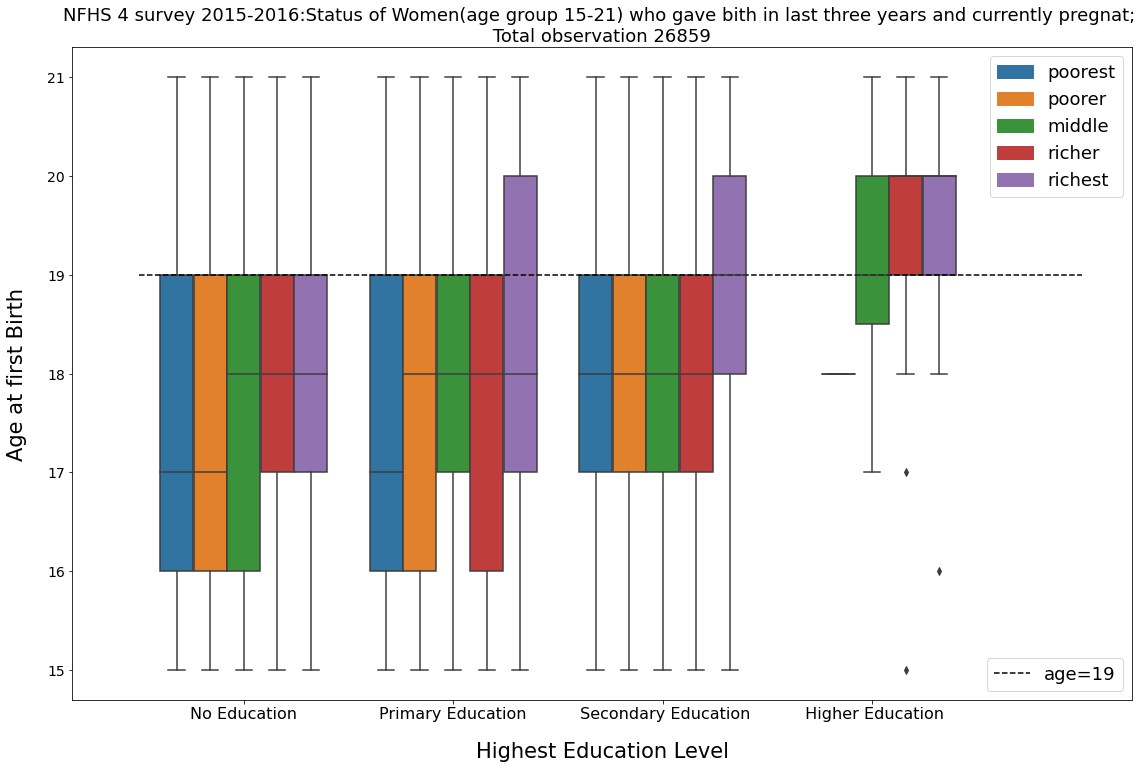

In [7]:
plt.figure(figsize=(19,12))
plot=sns.boxplot(x='v106', y='v212', data=df, hue='v190')

#padded  x-axis label

plt.xlabel("Highest Education Level", fontsize=21, labelpad=20)
plt.ylabel("Age at first Birth", fontsize=21, labelpad=20)
#renaming the axix points
plot.set_xticklabels( ('No Education', 'Primary Education',' Secondary Education',' Higher Education') )
# age=19 line
point1 = [-0.5, 19]
point2 = [4, 19]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
a=plt.plot(x_values, y_values, '-k', linestyle="--", label='age=19')
point1 = [-0.5, 22]
point2 = [4, 22]


#labeling legend with proxy artists 
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
plt.legend(fontsize=18)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

black_line = mlines.Line2D([], [], color='black',
                          markersize=15, label='age=19')
blue_patch = mpatches.Patch(color='#3274a1', label='poorest')
orange_patch = mpatches.Patch(color='#e1812c', label='poorer')
green_patch = mpatches.Patch(color='#3a923a', label='middle')
red_patch = mpatches.Patch(color='#c03d3e', label='richer')
violet_patch = mpatches.Patch(color='#9372b2', label='richest')
first_legend = plt.legend(handles=[ blue_patch, orange_patch, green_patch, red_patch, violet_patch],fontsize=18)
ax = plt.gca().add_artist(first_legend)
plt.title("NFHS 3 survey 2004-2005:Status of Women(age group 15-21) who gave bith in last three years and currently pregnat; \n Total observation 26859 ", fontsize=18)
plt.legend(handles=a, loc=4,fontsize=18 )
plt.show()

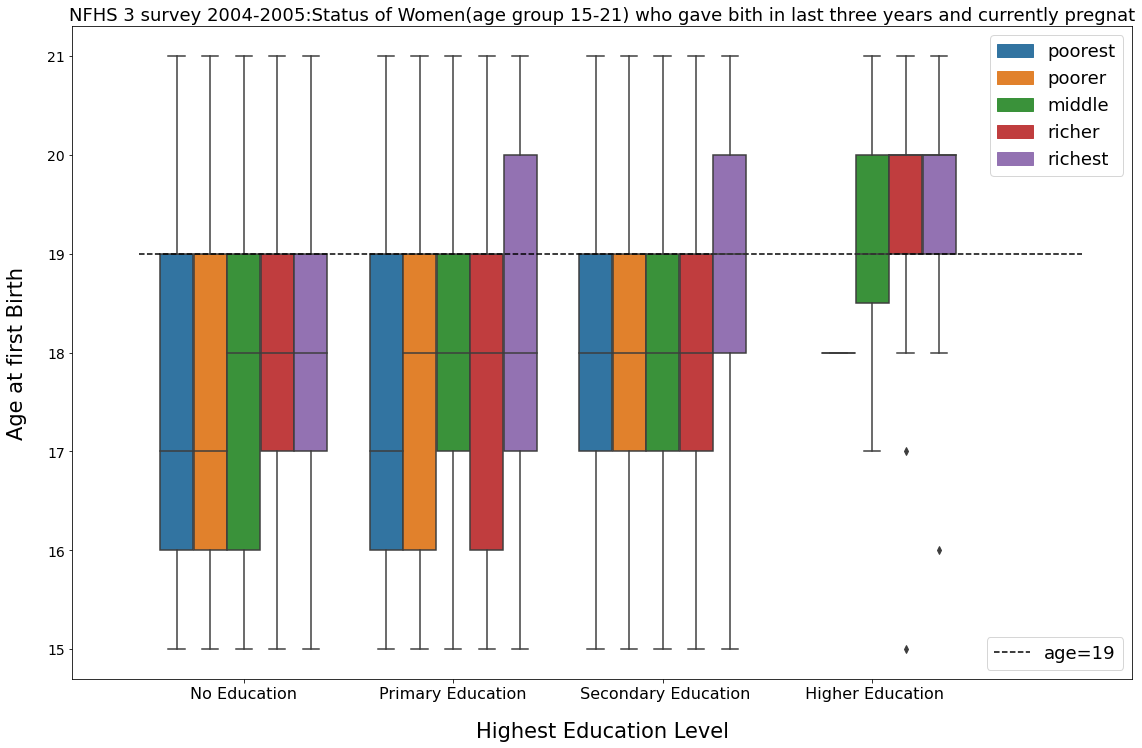

In [5]:
plt.figure(figsize=(19,12))
plot=sns.boxplot(x='v106', y='v212', data=df, hue='v190')

#padded  x-axis label

plt.xlabel("Highest Education Level", fontsize=21, labelpad=20)
plt.ylabel("Age at first Birth", fontsize=21, labelpad=20)
#renaming the axix points
plot.set_xticklabels( ('No Education', 'Primary Education',' Secondary Education',' Higher Education') )
# age=19 line
point1 = [-0.5, 19]
point2 = [4, 19]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
a=plt.plot(x_values, y_values, '-k', linestyle="--", label='age=19')
point1 = [-0.5, 22]
point2 = [4, 22]


#labeling legend with proxy artists 
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
plt.legend(fontsize=18)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

black_line = mlines.Line2D([], [], color='black',
                          markersize=15, label='age=19')
blue_patch = mpatches.Patch(color='#3274a1', label='poorest')
orange_patch = mpatches.Patch(color='#e1812c', label='poorer')
green_patch = mpatches.Patch(color='#3a923a', label='middle')
red_patch = mpatches.Patch(color='#c03d3e', label='richer')
violet_patch = mpatches.Patch(color='#9372b2', label='richest')
first_legend = plt.legend(handles=[ blue_patch, orange_patch, green_patch, red_patch, violet_patch],fontsize=18)
ax = plt.gca().add_artist(first_legend)
plt.title("NFHS 3 survey 2004-2005:Status of Women(age group 15-21) who gave bith in last three years and currently pregnat", fontsize=18)
plt.legend(handles=a, loc=4,fontsize=18 )
plt.show()

# cleaning data

In [57]:
df['v212'].isnull().sum(axis = 0)

1272

In [102]:
# filling missing values in v212 since we are counting pregnat women and women who have given birth in last 3 years:
#in age group of 15-21

In [58]:
df['c212']=df['v212']
df['c212'].fillna(df['v012'],inplace=True)

In [59]:
df['c212'].isnull().sum(axis = 0)

0

In [60]:
df['n106'] = np.where(df['v106'] == 3, 1, 0)

In [61]:
df['n212'] = np.where(df['c212'] >= 19, 1, 0)

In [62]:
df1 = df[['n212', 'n106','v190',]]

In [29]:
df1 = df[['n212', 'v106','v190',]]

In [63]:
df['n106'].value_counts()

0    6419
1     117
Name: n106, dtype: int64

In [64]:
df['n212'] = np.where(df['c212'] >= 19, 1, 0)

<AxesSubplot:>

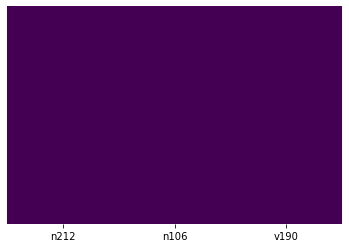

In [23]:
#checking for missing values
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

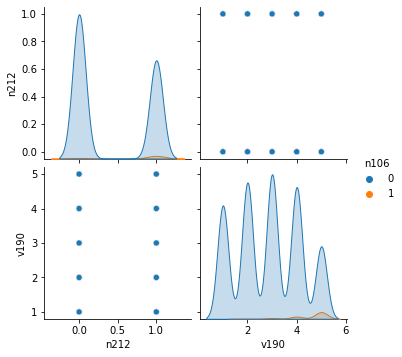

In [24]:
sns.pairplot(df1, hue='n106')

In [65]:
t=df1.corr()

In [66]:
t

,n212,n106,v190
n212,1.000000,0.130212,0.219586
n106,0.130212,1.000000,0.177988
v190,0.219586,0.177988,1.000000


<AxesSubplot:>

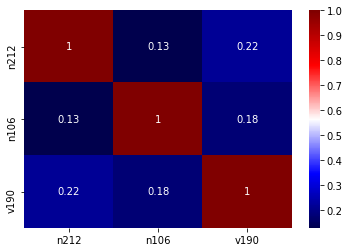

In [27]:
sns.heatmap(t, annot=True, cmap='seismic')

<AxesSubplot:xlabel='v190', ylabel='count'>

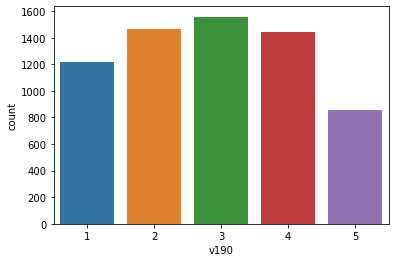

In [28]:
sns.countplot(x='v190',data=df1)

# logistic regression

In [76]:
from sklearn.model_selection import train_test_split
X = df1[['n106','v190']]
y = df1['n212']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# ** Train and fit a logistic regression model on the training set.**

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74      2670
           1       0.64      0.22      0.32      1906

    accuracy                           0.62      4576
   macro avg       0.63      0.56      0.53      4576
weighted avg       0.63      0.62      0.57      4576



In [91]:
X_train

,n212,v190
135666,1,2
285008,1,2
634150,1,5
689354,0,2
94825,0,3
...,...,...
83643,0,1
630978,1,2
259832,0,4
232360,1,2


In [ ]:
# further analysis will be done to estimate the TFR if females age of leagal marriage is increaed to 21 using Bongaarts model

<Figure size 1800x1800 with 0 Axes>

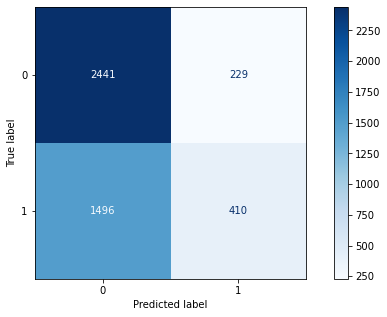

In [40]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

plot_confusion_matrix(logmodel, X_test, y_test, cmap='Blues')  
plt.rcParams["figure.figsize"] = (10,5)


In [48]:
df['R']=df['v130']
# creating new column B which considers birth events in last 3 years and women who are currently pregnant
conditions=[
    (df['v130']==1),
    (df['v130']==2),
    (df['v130']==3),
    (df['v130']>3),
    ]
values= [1,2,3,4]

df['R'] = np.select(conditions,values)

In [49]:
df['R'].nunique()

4

In [50]:
df['R'].value_counts()

1    4825
2    1086
3     382
4     243
Name: R, dtype: int64

In [51]:
df1 = df[['n212', 'v106','v190','R']]

In [52]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
g=df1['n212']
F=df1[['v106','v190', 'R']]
F=sm.add_constant(F)

F_train, F_test, g_train, g_test = train_test_split(F,g, test_size=0.7, random_state=42)
logit_model2=sm.Logit(g_train,F_train.astype(float))
result2=logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.647001
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   n212   No. Observations:                 1960
Model:                          Logit   Df Residuals:                     1956
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                 0.04289
Time:                        10:13:51   Log-Likelihood:                -1268.1
converged:                       True   LL-Null:                       -1324.9
Covariance Type:            nonrobust   LLR p-value:                 1.797e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3250      0.143     -9.264      0.000      -1.605      -1.045
v106           0.2506      0.

C:\Users\balli\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [81]:
df1['n106'].value_counts()

0    6419
1     117
Name: n106, dtype: int64

In [83]:
df1['n212'].value_counts()

0    3831
1    2705
Name: n212, dtype: int64

In [84]:
df['v102'].value_counts()

2    4476
1    2060
Name: v102, dtype: int64